<a href="https://colab.research.google.com/github/hojeong0328/git_test1/blob/main/%EC%B0%BD%EA%B3%B5%EC%84%A4_%EA%B3%BC%EC%A0%9C1_7%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# ====== 라이브러리 불러오기 ======

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from PIL import Image

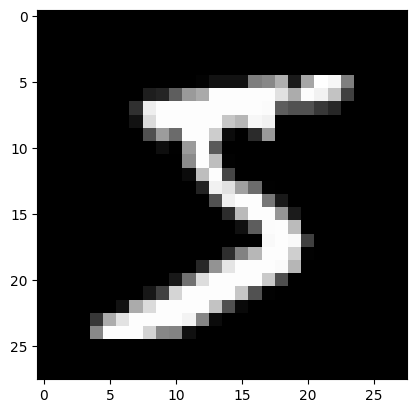

In [35]:

# ====== 1. 데이터 불러오기 ======
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

# ====== 2. 데이터 확인 (출력 제거) ======
plt.imshow(x_train[0], cmap="gray")

In [36]:
#28 * 28 -> 1 * 784 변환
X_train = x_train.reshape(60000, 784)
X_valid = x_valid.reshape(10000, 784)
#실수형 변환
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')

# 0~1 값으로 정규화
X_train/= 255
X_valid/= 255

print("X train matrix shape", X_train.shape)
print("X valid matrix shape", X_valid.shape)

# one-hot incoding, (ex.7 -> (0,0,0,0,0,0,1,0,0)로 변환)
Y_train = to_categorical(y_train, 10)
Y_valid = to_categorical(y_valid, 10)

print("Y_train matrix shape", Y_train.shape)
print("Y_valid matrix shape", Y_valid.shape)

X train matrix shape (60000, 784)
X valid matrix shape (10000, 784)
Y_train matrix shape (60000, 10)
Y_valid matrix shape (10000, 10)


In [40]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))

model.add(Activation('relu'))
model.add(Dense(256))

model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9993 - loss: 0.0038
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9994 - loss: 0.0046
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9990 - loss: 0.0056
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9993 - loss: 0.0050
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9992 - loss: 0.0037
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9993 - loss: 0.0022
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9996 - loss: 0.0020
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9996 - loss: 0.0028
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9986 - loss: 0.0082
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9995 - loss: 0.0023


In [76]:
score = model.evaluate(X_valid, Y_valid)
print('Test score', score[0])
print('Test accuracy', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9788 - loss: 0.2649
Test score 0.21350058913230896
Test accuracy 0.982200026512146


In [77]:
predicted_class = np.argmax(model.predict(X_valid), axis = 1)
correct_indices = np.nonzero(predicted_class == y_valid)[0]
print(len(correct_indices))
incorrect_indices = np.nonzero(predicted_class != y_valid)[0]
print(len(incorrect_indices))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
9822
178


In [82]:
# plt.figure()

# for i in range(9) :
#     plt.subplot(3, 3, i+1)
#     correct= correct_indices[i]
#     plt.imshow(x_valid[correct].reshape(28, 28), cmap="gray")
#     plt.title("Predicted {}, Correct {}".format(predicted_class[correct], y_valid[correct]))

# plt.tight_layout()

In [83]:
# plt.figure()

# for i in range(9) :
#     plt.subplot(3, 3, i+1)
#     correct= incorrect_indices[i]
#     plt.imshow(x_valid[correct].reshape(28, 28), cmap="gray")
#     plt.title("Predicted {}, Correct {}".format(predicted_class[correct], y_valid[correct]))

# plt.tight_layout()

In [84]:
def predict_image(img_path):
    try:

        img = Image.open(img_path).convert("L")
    except FileNotFoundError:
        print(f"Error: 파일을 찾을 수 없습니다. 경로를 확인하세요: {img_path}")
        return

    img = img.resize((28, 28))
    img_array = np.array(img).astype("float32") / 255.0

    average_brightness = np.mean(img_array)

    if average_brightness > 0.5: #밝은 배경
        processed_img = 1 - img_array
        print(f"[{img_path}] 흰 배경으로 인식 -> 색반전")
    else: #검은 배경
        processed_img = img_array
        print(f"[{img_path}] 검은 배경으로 인식 -> 원본 유지")

    # 1차원 벡터로 변환
    input_img = processed_img.reshape(1, 784)

    # 예측
    prediction = np.argmax(model.predict(input_img, verbose=0))

    # --- 시각화 코드 주석 처리 (출력 제거) ---
    # plt.imshow(processed_img, cmap="gray")
    # plt.title(f"예측된 숫자: {prediction}")
    # plt.axis("off")
    # plt.show()
    # ----------------------------------------

    print(f"예측 결과: {prediction}\n" + "="*20)

# ====== 예시 ======
# 'test0.png'는 흰 배경 이미지, 'test0_dark.png'는 검은 배경 이미지라고 가정
predict_image("test0.png")
predict_image("test1.png")
predict_image("test2.png")
predict_image("test3.png")
predict_image("test4.png")
predict_image("test5.png")
predict_image("test6.png")
predict_image("test7.png")
predict_image("test8.png")
predict_image("test9.png")


[test0.png] 검은 배경으로 인식 -> 원본 유지
예측 결과: 6
[test1.png] 흰 배경으로 인식 -> 색반전
예측 결과: 1
[test2.png] 흰 배경으로 인식 -> 색반전
예측 결과: 2
[test3.png] 검은 배경으로 인식 -> 원본 유지
예측 결과: 3
[test4.png] 흰 배경으로 인식 -> 색반전
예측 결과: 4
[test5.png] 흰 배경으로 인식 -> 색반전
예측 결과: 5
[test6.png] 검은 배경으로 인식 -> 원본 유지
예측 결과: 5
[test7.png] 검은 배경으로 인식 -> 원본 유지
예측 결과: 7
[test8.png] 검은 배경으로 인식 -> 원본 유지
예측 결과: 8
[test9.png] 흰 배경으로 인식 -> 색반전
예측 결과: 9
